In [1]:
using Plots
using Statistics
using DataFrames
using CSV
using LinearAlgebra

open("./49_Industry_Portfolios.CSV", "r") do f
    global df
    csv = join(readlines(f)[2268:2361], '\n')
    df = CSV.read(IOBuffer(csv))
end

,Column1,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1927,26.23,41.88,-99.99,64.22,47.72,-22.67,15.66,8.97
2,1928,2.46,27.95,-99.99,38.8,-2.3,44.33,46.38,35.48
3,1929,-16.27,-14.53,-99.99,-16.07,-7.17,-57.07,-36.28,-4.72
4,1930,-47.79,-11.23,-99.99,-53.28,-3.24,-20.45,-19.85,-15.73
5,1931,-48.67,-33.53,-99.99,-43.07,-20.18,-67.55,-74.4,-65.88
6,1932,11.94,-5.33,-99.99,13.03,-6.66,-42.77,-33.77,-46.78
7,1933,156.93,41.32,-99.99,189.18,52.58,87.09,55.6,53.33
8,1934,33.4,9.25,-99.99,-11.62,30.76,-15.36,17.86,36.81
9,1935,-7.43,23.01,-99.99,31.13,18.61,60.95,78.39,16.5


In [2]:
# preprocessing
inds = describe(df).min .> -99 # remove missing value
inds[1] = 0 # remove year
inds = inds .* range(1; stop=length(inds))
filter!(x -> x > 0, inds)
df_sub = df[:, inds]

,Agric,Food,Beer,Smoke,Toys,Fun,Books,Hshld,Clths
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,26.23,41.88,64.22,47.72,-22.67,15.66,8.97,43.03,43.13
2,2.46,27.95,38.8,-2.3,44.33,46.38,35.48,59.07,7.74
3,-16.27,-14.53,-16.07,-7.17,-57.07,-36.28,-4.72,-34.99,-28.47
4,-47.79,-11.23,-53.28,-3.24,-20.45,-19.85,-15.73,-42.26,-20.63
5,-48.67,-33.53,-43.07,-20.18,-67.55,-74.4,-65.88,-36.51,-24.27
6,11.94,-5.33,13.03,-6.66,-42.77,-33.77,-46.78,-22.78,-21.67
7,156.93,41.32,189.18,52.58,87.09,55.6,53.33,38.4,93.81
8,33.4,9.25,-11.62,30.76,-15.36,17.86,36.81,18.21,12.55
9,-7.43,23.01,31.13,18.61,60.95,78.39,16.5,21.34,16.13


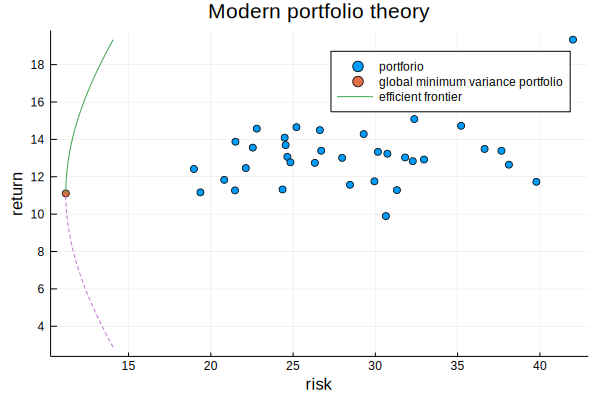

In [3]:
mat = convert(Matrix, df_sub)
E = mean(mat; dims=1)
v = inv(cov(mat))
n = size(mat)[2]

A = 0.0
for i in 1:n
    for j in 1:n
        A += v[i,j]E[j]
    end
end

B = 0.0
for i in 1:n
    for j in 1:n
        B += v[i,j]E[i]E[j]
    end
end

C = 0.0
for i in 1:n
    for j in 1:n
        C += v[i,j]
    end
end

D = B*C - A^2

function sigma(E)
    sqrt((C * E^2 - 2A * E + B)/D)
end


# portfolio
scatter(sqrt.(diag(cov(mat))), E', label="portforio")

# global minimum variance portfolio
y = A/C
x = sigma(y)
scatter!([x], [y], label="global minimum variance portfolio")

# effirencent frontier
E_min = A/C
E_max = max(E...)
ys = range(E_min; stop=E_max, length=1000)
xs = [sigma(y) for y in ys]
plot!(xs, ys, label="efficient frontier")

# minimum variance frontier
E_min = 2 * A/C - max(E...)
E_max= A/C
ys = range(E_min; stop=E_max, length=1000)
xs = [sigma(y) for y in ys]
plot!(xs, ys, linestyle=:dash, xlabel="risk", ylabel="return", label="", title="Modern portfolio theory")